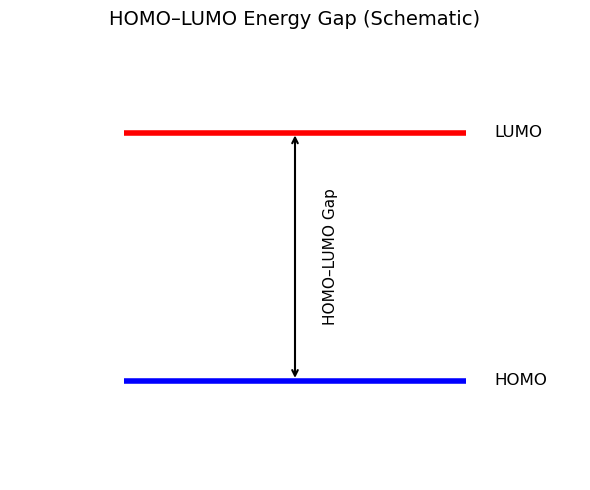

In [ ]:
import matplotlib.pyplot as plt

homo_energy = -5.0
lumo_energy = -2.5

plt.figure(figsize=(6, 5))

plt.hlines(y=homo_energy, xmin=0.2, xmax=0.8, colors='blue', linewidth=4, label="HOMO")
plt.text(0.85, homo_energy, 'HOMO', va='center', fontsize=12)

plt.hlines(y=lumo_energy, xmin=0.2, xmax=0.8, colors='red', linewidth=4, label="LUMO")
plt.text(0.85, lumo_energy, 'LUMO', va='center', fontsize=12)

plt.annotate('', xy=(0.5, lumo_energy), xytext=(0.5, homo_energy),
             arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))
plt.text(0.55, (homo_energy + lumo_energy)/2, 'HOMO–LUMO Gap', rotation=90, va='center', ha='left', fontsize=11)

plt.xlim(0, 1)
plt.ylim(homo_energy - 1, lumo_energy + 1)
plt.axis('off')
plt.title('HOMO–LUMO Energy Gap (Schematic)', fontsize=14)
plt.tight_layout()
plt.show()

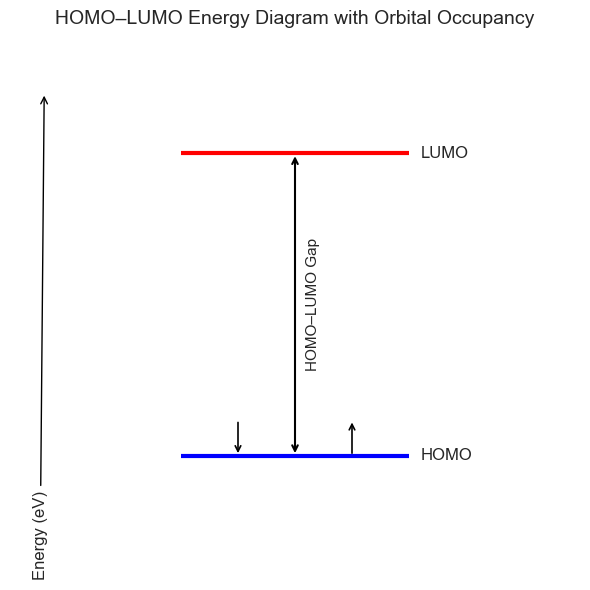

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

homo_energy = -5
lumo_energy = -2.5

ax.hlines(y=homo_energy, xmin=0.3, xmax=0.7, colors='blue', linewidth=3)
ax.text(0.72, homo_energy, 'HOMO', va='center', fontsize=12)

ax.hlines(y=lumo_energy, xmin=0.3, xmax=0.7, colors='red', linewidth=3)
ax.text(0.72, lumo_energy, 'LUMO', va='center', fontsize=12)

ax.annotate('', xy=(0.5, lumo_energy), xytext=(0.5, homo_energy),
            arrowprops=dict(arrowstyle='<->', color='black', linewidth=1.5))
ax.text(0.52, (homo_energy + lumo_energy) / 2, 'HOMO-LUMO Gap', fontsize=11, va='center', rotation=90)

ax.annotate('', xy=(0.6, homo_energy + 0.3), xytext=(0.6, homo_energy),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.2))
ax.annotate('', xy=(0.4, homo_energy), xytext=(0.4, homo_energy + 0.3),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1.2))

ax.annotate('Energy (eV)', xy=(0.06, -2), xytext=(0.04, -6),
            arrowprops=dict(arrowstyle='->', color='black'), rotation=90, fontsize=12)

ax.set_xlim(0, 1)
ax.set_ylim(homo_energy - 1, lumo_energy + 1)
ax.axis('off')
ax.set_title('HOMO-LUMO Energy Diagram with Orbital Occupancy', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = " CN(C)CCOC(C1=CC=CC=C1)C1=CC=CC=C1" 

mol = Chem.MolFromSmiles(smiles)

img = Draw.MolToImage(mol, size=(300, 300))
img.show()

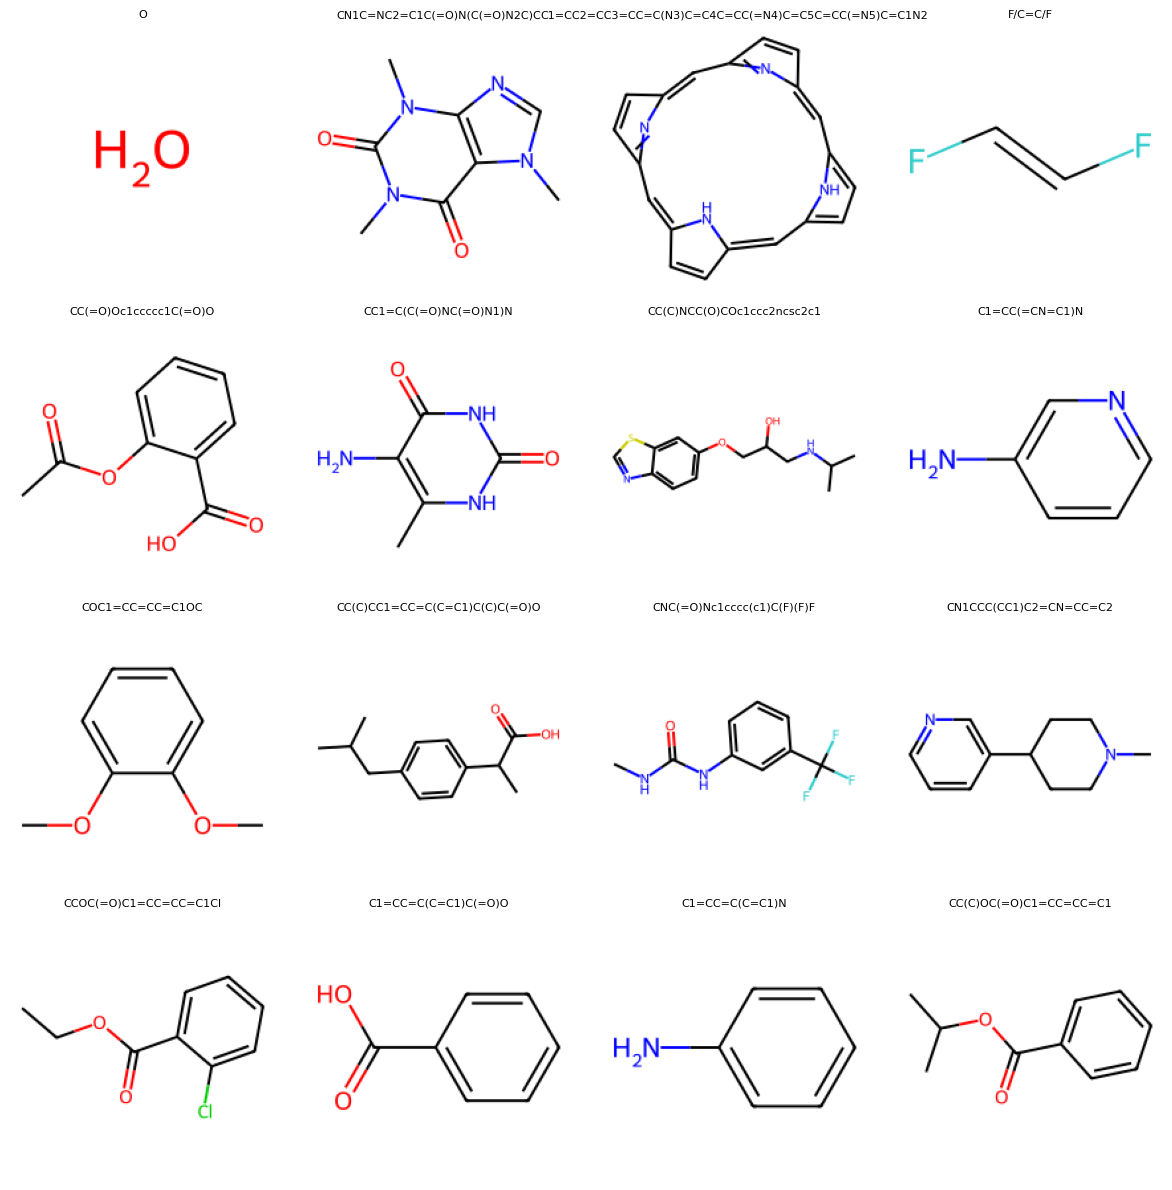

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

smiles_list = [
    "O",
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "C1=CC2=CC3=CC=C(N3)C=C4C=CC(=N4)C=C5C=CC(=N5)C=C1N2",
    "F/C=C/F",
    "CC(=O)Oc1ccccc1C(=O)O",  
    "CC1=C(C(=O)NC(=O)N1)N",  
    "CC(C)NCC(O)COc1ccc2ncsc2c1",
    "C1=CC(=CN=C1)N",
    "COC1=CC=CC=C1OC",
    "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O",
    "CNC(=O)Nc1cccc(c1)C(F)(F)F",
    "CN1CCC(CC1)C2=CN=CC=C2",
    "CCOC(=O)C1=CC=CC=C1Cl",
    "C1=CC=C(C=C1)C(=O)O",
    "C1=CC=C(C=C1)N",
    "CC(C)OC(=O)C1=CC=CC=C1"
]

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for i, (mol, smiles) in enumerate(zip(mols, smiles_list)):
    row, col = divmod(i, 4)
    if mol:
        img = Draw.MolToImage(mol, size=(200, 200))
        axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(smiles, fontsize=8)

plt.tight_layout()
plt.show()

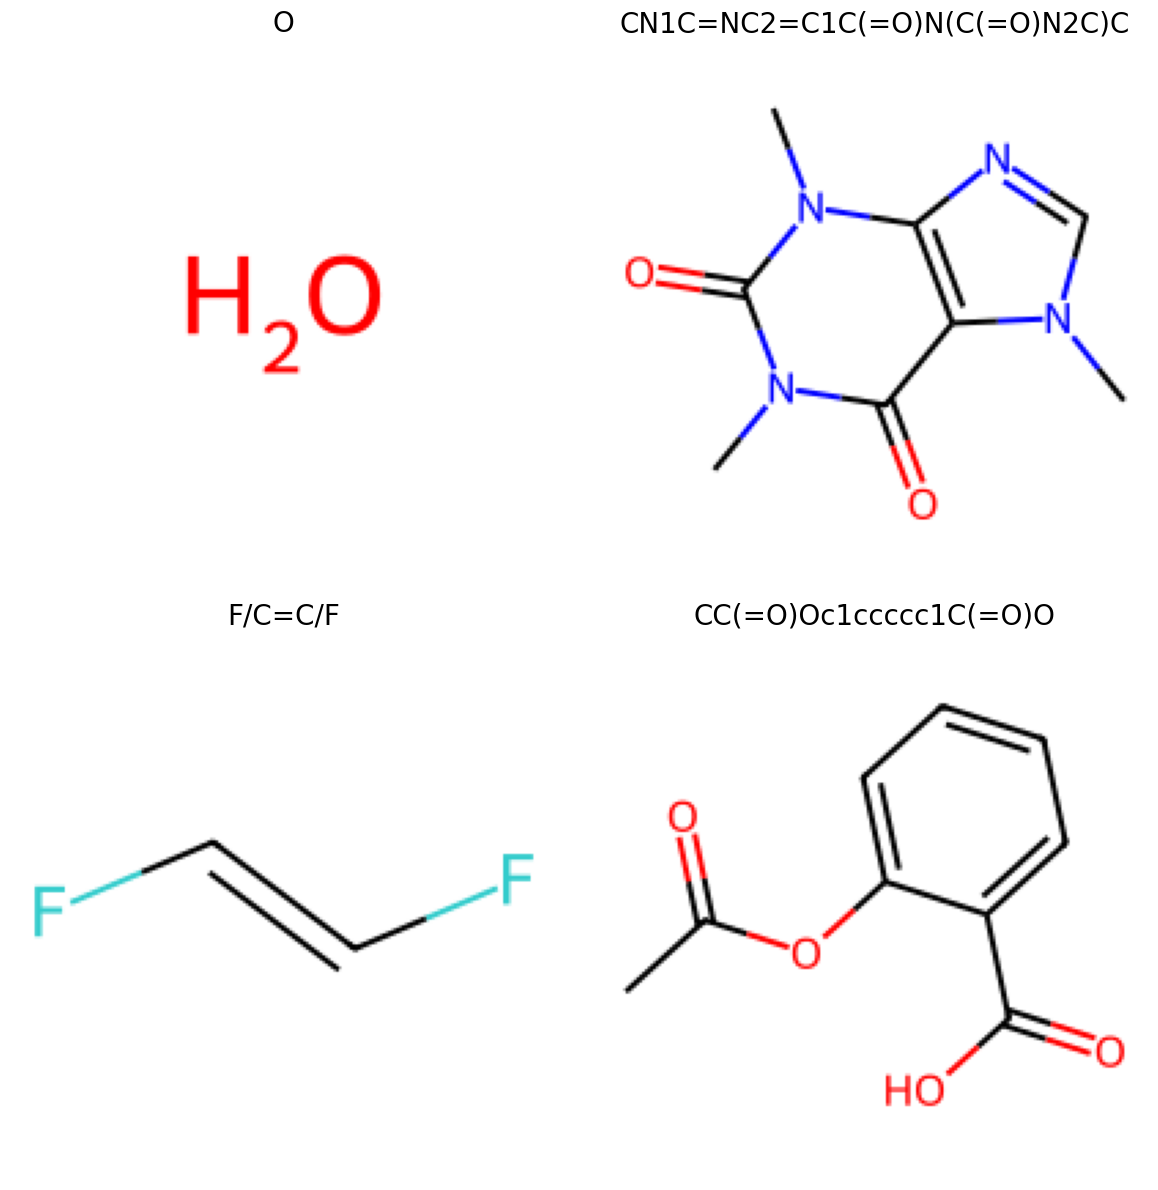

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

smiles_list = [
    "O",
    "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "F/C=C/F",
    "CC(=O)Oc1ccccc1C(=O)O", 
]

# convert to RDKit molecule objects
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# grid of molecule images with SMILES titles
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, (mol, smiles) in enumerate(zip(mols, smiles_list)):
    row, col = divmod(i, 2)
    if mol:
        img = Draw.MolToImage(mol, size=(200, 200))
        axs[row, col].imshow(img)
    axs[row, col].axis('off')
    axs[row, col].set_title(smiles, fontsize=20)

plt.tight_layout()
plt.show()

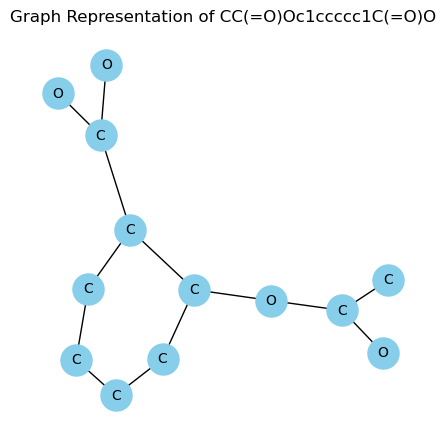

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
import networkx as nx
import matplotlib.pyplot as plt

smiles = "CC(=O)Oc1ccccc1C(=O)O" # Aspirin
mol = Chem.MolFromSmiles(smiles)

# RDKit Molecule
Draw.MolToImage(mol)

#--- Convert to NetworkX Graph 
g = nx.Graph()
for atom in mol.GetAtoms():
    g.add_node(atom.GetIdx(), label=atom.GetSymbol())
for bond in mol.GetBonds():
    g.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

# Draw Graph Representation 
labels = nx.get_node_attributes(g, 'label')
pos = nx.spring_layout(g)
plt.figure(figsize=(4, 4))
nx.draw(g, pos, labels=labels, with_labels=True, node_color='skyblue', node_size=500, font_size=10)
plt.title("Graph Representation of CC(=O)Oc1ccccc1C(=O)O")
plt.show()

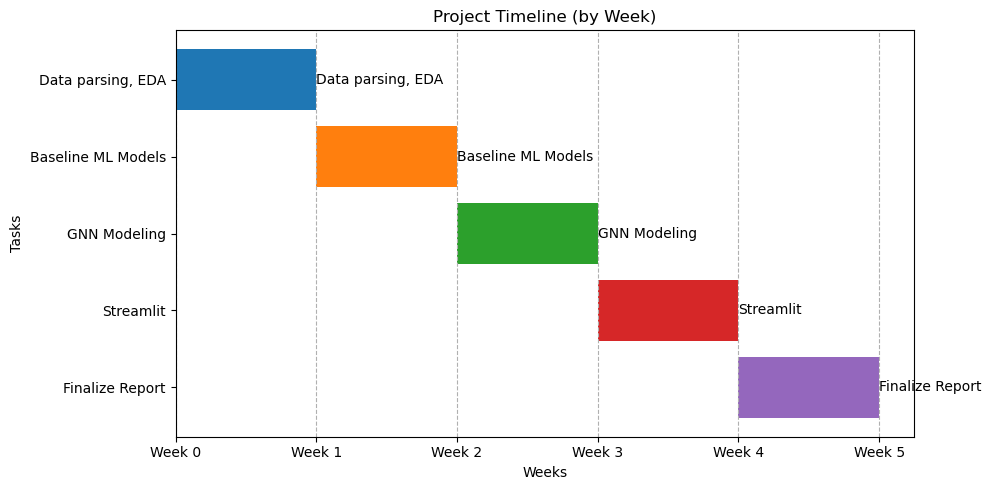

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

tasks = [
    {"task": "Data parsing, EDA", "start_week": 0, "duration_weeks": 1},
    {"task": "Baseline ML Models", "start_week": 1, "duration_weeks": 1},
    {"task": "GNN Modeling", "start_week": 2, "duration_weeks": 1},
    {"task": "Streamlit", "start_week": 3, "duration_weeks": 1},
    {"task": "Finalize Report", "start_week": 4, "duration_weeks": 1},
]

start_date = datetime(2025, 4, 21)  # Monday, April 21st, 2025

dates = [start_date + timedelta(weeks=task['start_week']) for task in tasks]
end_dates = [date + timedelta(weeks=task['duration_weeks']) for date, task in zip(dates, tasks)]

# Gantt chart
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, task in enumerate(tasks):
    ax.barh(i, (end_dates[i] - dates[i]).days, left=dates[i], height=0.8, color=colors[i])
    ax.text(end_dates[i], i, task['task'], ha='left', va='center')

ax.set_yticks(range(len(tasks)))
ax.set_yticklabels([task['task'] for task in tasks])

# x-axis to show weeks
week_starts = [start_date + timedelta(weeks=i) for i in range(6)] 
ax.set_xticks(week_starts)
ax.set_xticklabels([f'Week {i}' for i in range(6)])

# Set labels and title
ax.set_xlabel("Weeks")
ax.set_ylabel("Tasks")
ax.set_title("Project Timeline (by Week)")

ax.invert_yaxis()  
ax.grid(True, axis='x', linestyle='--')
plt.tight_layout()
plt.show()

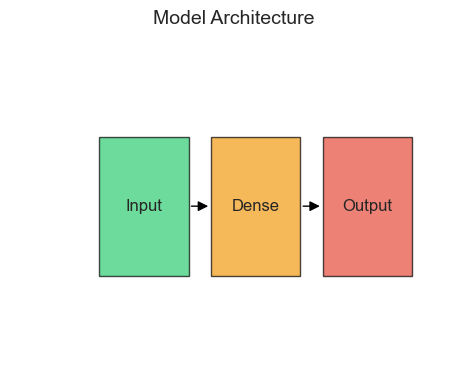

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch

# cleaner plots
plt.style.use('seaborn-v0_8-whitegrid')

fig = plt.figure(figsize=(14, 4))

ax2 = plt.subplot(132)
ax2.axis('off')

input_box = Rectangle((0.2, 0.3), 0.2, 0.4, facecolor='#2ecc71', alpha=0.7, edgecolor='black')
hidden_box = Rectangle((0.45, 0.3), 0.2, 0.4, facecolor='#f39c12', alpha=0.7, edgecolor='black')
output_box = Rectangle((0.7, 0.3), 0.2, 0.4, facecolor='#e74c3c', alpha=0.7, edgecolor='black')

arrow1 = FancyArrowPatch((0.4, 0.5), (0.45, 0.5), arrowstyle='-|>', mutation_scale=15, color='black')
arrow2 = FancyArrowPatch((0.65, 0.5), (0.7, 0.5), arrowstyle='-|>', mutation_scale=15, color='black')

ax2.add_patch(input_box)
ax2.add_patch(hidden_box)
ax2.add_patch(output_box)
ax2.add_patch(arrow1)
ax2.add_patch(arrow2)

ax2.text(0.3, 0.5, 'Input', ha='center', va='center', fontsize=12)
ax2.text(0.55, 0.5, 'Dense', ha='center', va='center', fontsize=12)
ax2.text(0.8, 0.5, 'Output', ha='center', va='center', fontsize=12)
ax2.set_title('Model Architecture', fontsize=14)

plt.tight_layout()
plt.show()

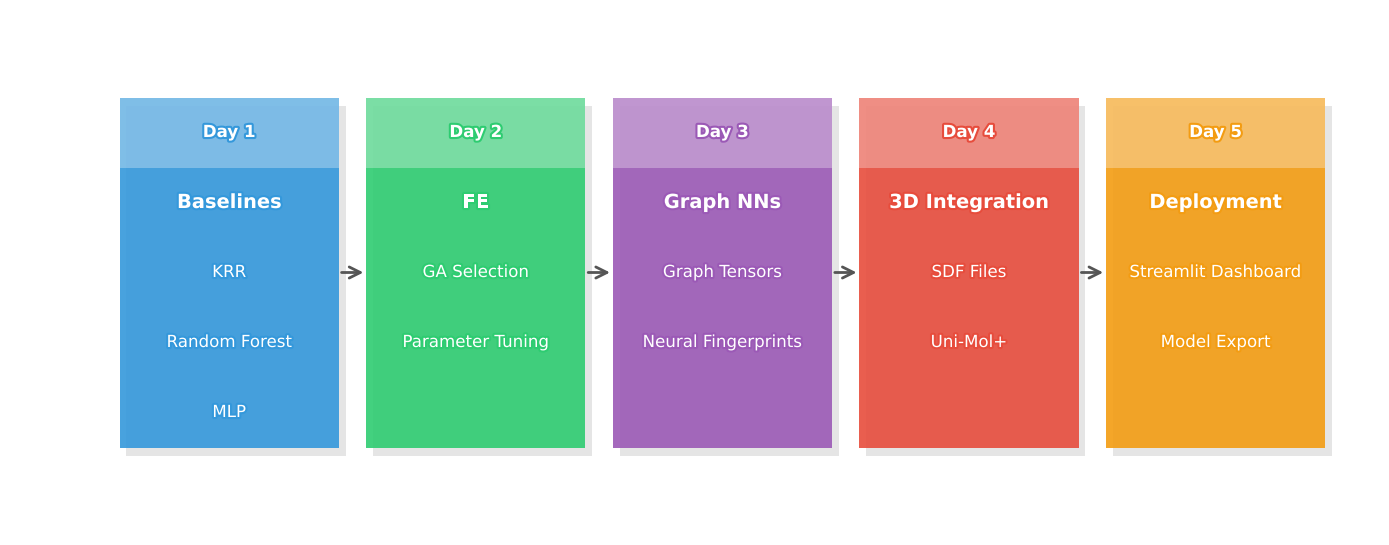

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyArrowPatch
import matplotlib.patheffects as PathEffects

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 3)
ax.axis('off')

colors = {
    'phase1': '#3498db',  
    'phase2': '#2ecc71',  
    'phase3': '#9b59b6',  
    'phase4': '#e74c3c',  
    'phase5': '#f39c12',  
    'bg': '#f8f9fa',      
    'text': '#2c3e50',    
    'highlight': '#ecf0f1' 
}

phases = [
    {
        'title': 'Baselines',
        'day': 'Day 1',
        'content': ['KRR', 'Random Forest', 'MLP'],
        'color': colors['phase1']
    },
    {
        'title': 'FE',
        'day': 'Day 2',
        'content': ['GA Selection', 'Parameter Tuning'],
        'color': colors['phase2']
    },
    {
        'title': 'Graph NNs',
        'day': 'Day 3',
        'content': ['Graph Tensors', 'Neural Fingerprints'],
        'color': colors['phase3']
    },
    {
        'title': '3D Integration',
        'day': 'Day 4',
        'content': ['SDF Files', 'Uni-Mol+'],
        'color': colors['phase4']
    },
    {
        'title': 'Deployment',
        'day': 'Day 5',
        'content': ['Streamlit Dashboard', 'Model Export'],
        'color': colors['phase5']
    }
]

block_width = 1.6
block_height = 2.0
start_x = 0.8
spacing = 0.2

for i, phase in enumerate(phases):
    # calc position
    x = start_x + i * (block_width + spacing)
    y = 0.5
    
    shadow = Rectangle((x+0.05, y-0.05), block_width, block_height, 
                      facecolor='black', alpha=0.1)
    ax.add_patch(shadow)
    
    block = Rectangle((x, y), block_width, block_height, 
                     facecolor=phase['color'], edgecolor='none', 
                     alpha=0.9, linewidth=0)
    ax.add_patch(block)
    
    day_bg = Rectangle((x, y+block_height-0.4), block_width, 0.4, 
                      facecolor='white', alpha=0.3, edgecolor='none')
    ax.add_patch(day_bg)
    
    day_text = ax.text(x+block_width/2, y+block_height-0.2, phase['day'], 
                     ha='center', va='center', fontsize=12, 
                     fontweight='bold', color='white')
    day_text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground=phase['color'])])
    
    title_text = ax.text(x+block_width/2, y+block_height-0.6, phase['title'], 
                       ha='center', va='center', fontsize=14, 
                       fontweight='bold', color='white')
    title_text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground=phase['color'])])
    
    for j, item in enumerate(phase['content']):
        item_y = y+block_height-1.0-j*0.4
        item_text = ax.text(x+block_width/2, item_y, item, 
                         ha='center', va='center', fontsize=12, 
                         color='white')
        item_text.set_path_effects([PathEffects.withStroke(linewidth=3, foreground=phase['color'])])
    
    if i < len(phases)-1:
        arrow = FancyArrowPatch(
            (x+block_width, y+block_height/2), 
            (x+block_width+spacing, y+block_height/2),
            arrowstyle='->', color='#555555', linewidth=2,
            mutation_scale=20
        )
        ax.add_patch(arrow)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()